### 1.1.
E.
### 1.2.
A.
### 1.3.
A.|

### 2.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt 

beer = pd.read_csv("beers.csv")
beer = beer.drop(columns=['Unnamed: 0'])
beer.head()


,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


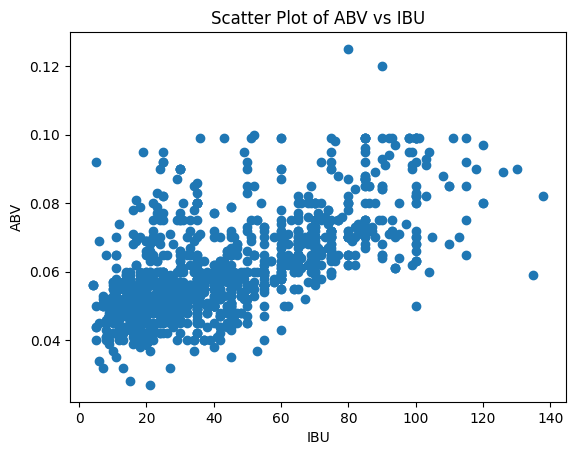

In [66]:
#2.2
beer_scatter = plt.scatter(beer['ibu'], beer['abv'])

plt.xlabel('IBU')
plt.ylabel('ABV')
plt.title('Scatter Plot of ABV vs IBU')

plt.show()

In [67]:
#2.3
clean_beer = beer.dropna(subset=['ibu', 'abv'])
clean_beer


,abv,ibu,id,name,style,brewery_id,ounces
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0
24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0
25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0
...,...,...,...,...,...,...,...
2398,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0
2399,0.069,69.0,1512,Worthy IPA (2013),American IPA,199,12.0
2400,0.060,50.0,1511,Worthy Pale,American Pale Ale (APA),199,12.0
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0


In [68]:
#2.4
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

beer_preprocessor = make_column_transformer(
    (StandardScaler(), ['ibu', 'abv']),  
    remainder='drop' 
)

beer_preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['ibu', 'abv'])])

In [69]:
#2.5
from sklearn.cluster import KMeans

n_clusters = 2
random_state=50
beer_cluster_k2 = KMeans(n_clusters=n_clusters, random_state=random_state)

beer_cluster_k2

KMeans(n_clusters=2, random_state=50)

In [70]:
#2.6
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessor', beer_preprocessor), 
    ('kmeans', beer_cluster_k2) 
])

pipeline.fit(clean_beer)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['ibu', 'abv'])])),
                ('kmeans', KMeans(n_clusters=2, random_state=50))])

In [71]:
#2.7
cluster_labels = pipeline.named_steps['kmeans'].labels_

clustered_beer = pd.DataFrame(clean_beer)
clustered_beer['cluster'] = cluster_labels

clustered_beer

,abv,ibu,id,name,style,brewery_id,ounces,cluster
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,1
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,1
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,1
24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,0
25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,0
...,...,...,...,...,...,...,...,...
2398,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0,1
2399,0.069,69.0,1512,Worthy IPA (2013),American IPA,199,12.0,1
2400,0.060,50.0,1511,Worthy Pale,American Pale Ale (APA),199,12.0,0
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,1


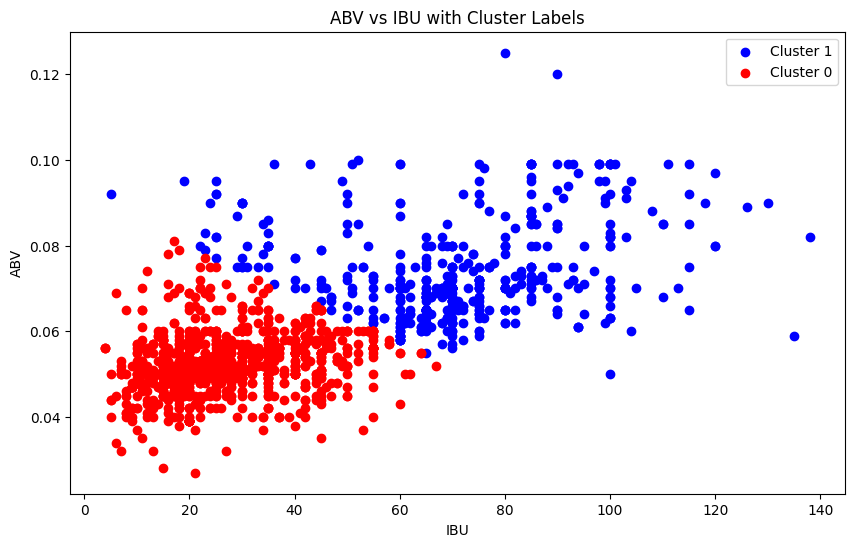

In [72]:
#2.8
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster_label, color in zip(clustered_beer['cluster'].unique(), ['blue', 'red']):
    cluster_data = clustered_beer[clustered_beer['cluster'] == cluster_label]
    plt.scatter(cluster_data['ibu'], cluster_data['abv'], label=f'Cluster {cluster_label}', color=color)

plt.xlabel('IBU')
plt.ylabel('ABV')
plt.title('ABV vs IBU with Cluster Labels')

plt.legend()

plt.show()

In [73]:
#2.9
beer_cluster_k2_wssd = pipeline.named_steps['kmeans'].inertia_
beer_cluster_k2_wssd

1110.9150845786987

In [74]:
#2.10
beer_ks = range(1, 11)

In [75]:
#2.11
beer_wssds = [Pipeline([
                    ('preprocessor', beer_preprocessor),
                    ('kmeans', KMeans(n_clusters=k, random_state=random_state))
                ]).fit(clean_beer).named_steps['kmeans'].inertia_
              for k in beer_ks]

beer_wssds

[2810.000000000001,
 1110.9150845786987,
 808.2682452154775,
 614.2513383606602,
 474.5127046818411,
 417.13043217325463,
 363.0122980039586,
 315.94000236502814,
 298.5349686187622,
 265.7239480181038]

In [76]:
#2.12
beer_model_stats_data = {'k': beer_ks, 'wssd': beer_wssds}

beer_model_stats = pd.DataFrame(beer_model_stats_data)

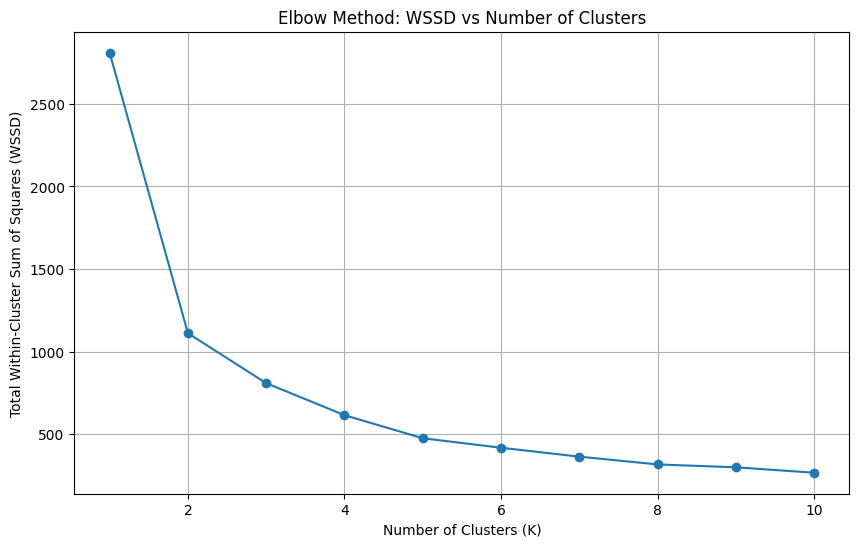

In [77]:
#2.13
plt.figure(figsize=(10, 6))
plt.plot(beer_model_stats['k'], beer_model_stats['wssd'], marker='o', linestyle='-')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Total Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Method: WSSD vs Number of Clusters')

plt.grid(True)

plt.show()

### 2.14.

K=2 , because this is the elbow point in which the decrease of WSSD slowed down. Elbow point means that beyond k=2, there is not much significant difference.

### 2.15.

B.

conclusion: 